# Imports

## Importing all the necessary libraries.

In [291]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Data

In [292]:
iris_data = pd.read_csv('iris_data.csv')
iris_data

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Data Analysis

## Let's get some information about the data.

In [293]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sepal length in cm  150 non-null    float64
 1   sepal width in cm   150 non-null    float64
 2   petal length in cm  150 non-null    float64
 3   petal width in cm   150 non-null    float64
 4   class               150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [294]:
iris_data.shape

(150, 5)

In [295]:
iris_data.describe()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Visualization

## Scattred Graph for 'Sepal Length VS Petal Lenght' and 'Sepal Width VS Petal Width'.

<AxesSubplot:xlabel='sepal width in cm', ylabel='petal width in cm'>

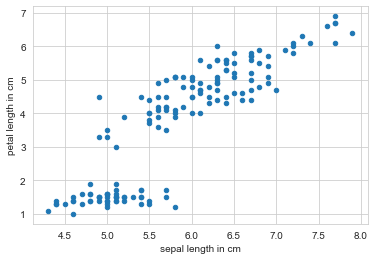

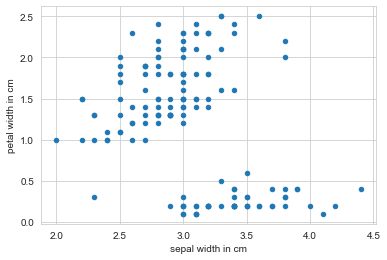

In [296]:
iris_data.plot(kind='scatter', x='sepal length in cm', y='petal length in cm')
iris_data.plot(kind='scatter', x='sepal width in cm', y='petal width in cm')

## Box plots are useful as they provide a visual summary of the data enabling researchers to quickly identify mean values, the dispersion of the data set, and signs of skewness.

<AxesSubplot:>

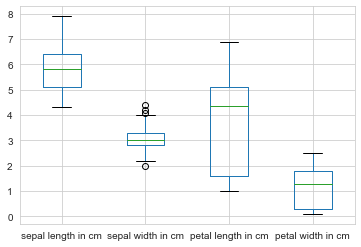

In [297]:
iris_data.boxplot()

## Scattered classification graph of iris-setosa, iris-versicolor and iris-virginica.

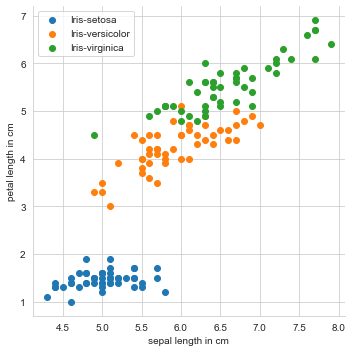

In [298]:
sns.set_style('whitegrid')
sns.FacetGrid(iris_data, hue='class', height=5).map(plt.scatter, 'sepal length in cm', 'petal length in cm')
plt.legend()

## A pairs plot allows us to see both distribution of single variables and relationships between two variables.

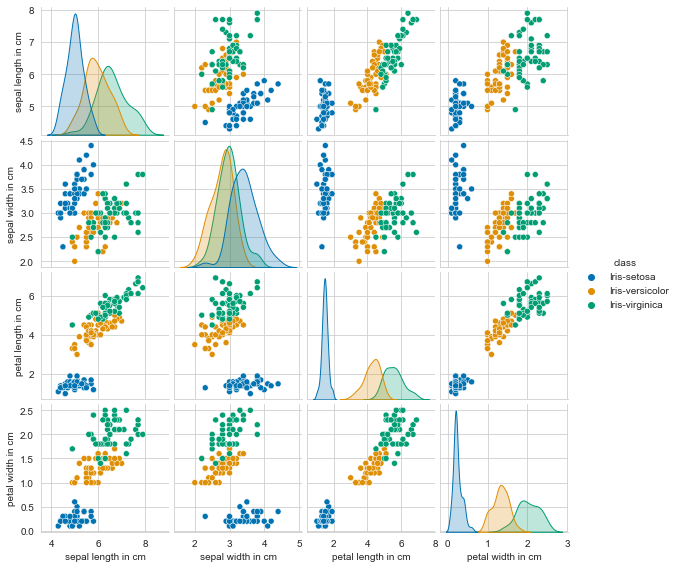

In [299]:
sns.pairplot(iris_data, hue='class', height=2, palette='colorblind')

## A heatmap is a graphical representation of data in which data values are represented as colors. That is, it uses color in order to communicate a value to the reader.

<AxesSubplot:>

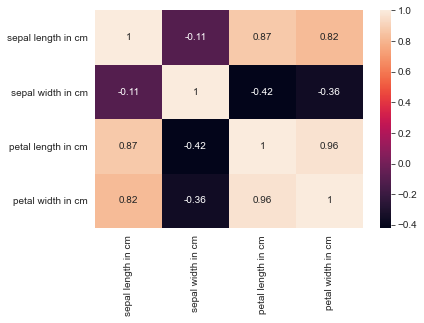

In [300]:
sns.heatmap(iris_data.corr(), annot=True)

# Preprocessing

In [301]:
Y = iris_data['class']
X = iris_data.drop(iris_data.columns[4], axis=1)

In [302]:
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

X

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


In [303]:
X.describe()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.439167,0.467571,0.457778
std,0.230018,0.180664,0.299054,0.317984
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


In [304]:
encoder = LabelEncoder()
Y = pd.DataFrame(encoder.fit_transform(Y),)

class_mapping = {index: label for index, label in enumerate(encoder.classes_)}
class_mapping

{0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}

# Train And Test

In [305]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.7)

## The models used here are 'Linear Regression, Logistic Regression and Decission Tree regression'.

In [306]:
linear_model = LinearRegression()
logistic_model = LogisticRegression()
decision_model = DecisionTreeClassifier()

linear_model.fit(x_train, y_train)
logistic_model.fit(x_train, y_train.values.ravel())
decision_model.fit(x_train, y_train)

DecisionTreeClassifier()

# The Result !

In [307]:
print(f'  Linear Regression Accuracy: {linear_model.score(x_test, y_test)}')
print(f'Logistic Regression Accuracy: {logistic_model.score(x_test, y_test)}')
print(f'      Decision Tree Accuracy: {decision_model.score(x_test, y_test)}')

  Linear Regression Accuracy: 0.9021877812509288
Logistic Regression Accuracy: 0.9111111111111111
      Decision Tree Accuracy: 0.9555555555555556


## graphical investigation of the phylogenetic Tree

[Text(248.0, 398.64, 'X[2] <= 0.271\ngini = 0.666\nsamples = 105\nvalue = [37, 33, 35]'),
 Text(186.0, 326.15999999999997, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(310.0, 326.15999999999997, 'X[3] <= 0.688\ngini = 0.5\nsamples = 68\nvalue = [0, 33, 35]'),
 Text(248.0, 253.67999999999998, 'X[2] <= 0.669\ngini = 0.229\nsamples = 38\nvalue = [0, 33, 5]'),
 Text(124.0, 181.2, 'X[0] <= 0.181\ngini = 0.061\nsamples = 32\nvalue = [0, 31, 1]'),
 Text(62.0, 108.71999999999997, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(186.0, 108.71999999999997, 'gini = 0.0\nsamples = 31\nvalue = [0, 31, 0]'),
 Text(372.0, 181.2, 'X[3] <= 0.604\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(310.0, 108.71999999999997, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(434.0, 108.71999999999997, 'X[2] <= 0.754\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(372.0, 36.23999999999995, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(496.0, 36.23999999999995, 'gini = 0.0\

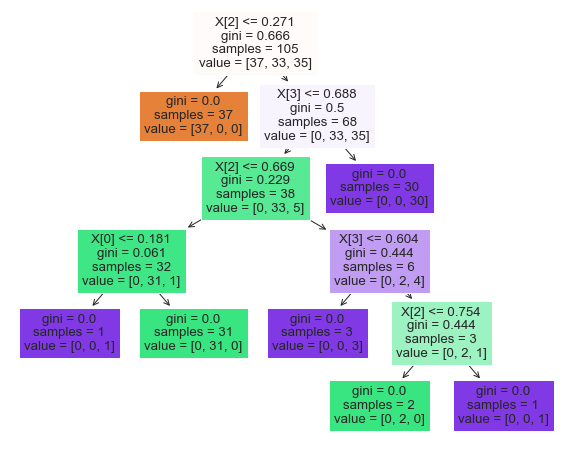

In [308]:
plt.figure(figsize=(10,8))
plot_tree(decision_model, filled=True)

# Conclusion

 ## petal length and petal width are the most useful features to identify various flower types. While Setosa can be easily identified (linearly separable), virginica and Versicolor have some overlap (almost linearly separable)